In [ ]:
Prueba de Taller
pregunta 1

En un histograma o en un line plot, visualizar el número de tweets conteniendo la palabra “goal”, cada minuto y cada 10 minutos. (BONUS: gestionar las variantes “goaaal”, “goooaallll”, etc. utilizando expresiones regulares).



In [1]:
#Script para cargar los tweeter desde la capteta de datos
from elasticsearch import Elasticsearch
from elasticsearch import helpers
es = Elasticsearch()
import os

if not(es.indices.exists(index="champion")):
    res = es.indices.create(index="champion")  

files = os.listdir("TP5/split_dataset_1")
                   

In [ ]:
import json
from elasticsearch import helpers
tweets=[]
for x in files:
    with open('TP5/split_dataset_1/'+x) as f:
        try:
            tweet = json.load(f)
            timestamp=int(tweet["timestamp_ms"])
            simple_tweet = {
                "timestamp":timestamp, \
                "date":tweet["created_at"], \
               "text": tweet['text'], \
               "username": tweet['user']['name'], \
               "location": tweet['user']['location']}
        except KeyError:
            error="error"
    tweets.append(simple_tweet)
    
    if (len(tweets)>=1000):
        i=0
        docs_as_string="["
        while i<1000:
            if i!=0:
                docs_as_string = docs_as_string + ','
            docs_as_string = docs_as_string + '\n' + json.dumps(tweets[i])
            i=i+1
        docs_as_string=docs_as_string+"]"
        res = helpers.bulk(es, json.loads(docs_as_string),index="champion", doc_type="_doc")
        tweets=[]
    


In [ ]:
#busca todos los tweets con la plabra goal
res = es.search(index="champion", body={"query": {"term":{"text":"goal"}}})

In [46]:
#busca agrega un indice para identidicar  el numero de tweew por minuto..
resporminuto = es.search(index="champion", body={"query": {"term":{"text":"goal"}},"aggs" : { "tweets_over_time" : \
                                                            { "date_histogram" : { "field" : \
                                                                                  "timestamp", "interval" : "1m" \
                                                                                 }}}})

In [48]:
#Creamos un DataFrame de Panda con los datos obtenidos en la consulta Elastic
import pandas as pd
import datetime
ByMinutes = pd.DataFrame(resporminuto['aggregations']['tweets_over_time']['buckets'])
ByMinutes = ByMinutes.rename(columns={'key': 'hora', 'doc_count': 'nº tweets'})

#cortar el daframe con los post minutos mas cercanos del partido
ByMinutes = ByMinutes.drop(ByMinutes[ByMinutes.hora < 1527357600000 ].index)

#tranformamos el dormato de fecha y hora
def timestamp2date(x):
    y = datetime.datetime.fromtimestamp(x/1000).strftime('%H:%M:%S')
    return y

ByMinutes['hora']=ByMinutes['hora'].apply(timestamp2date)



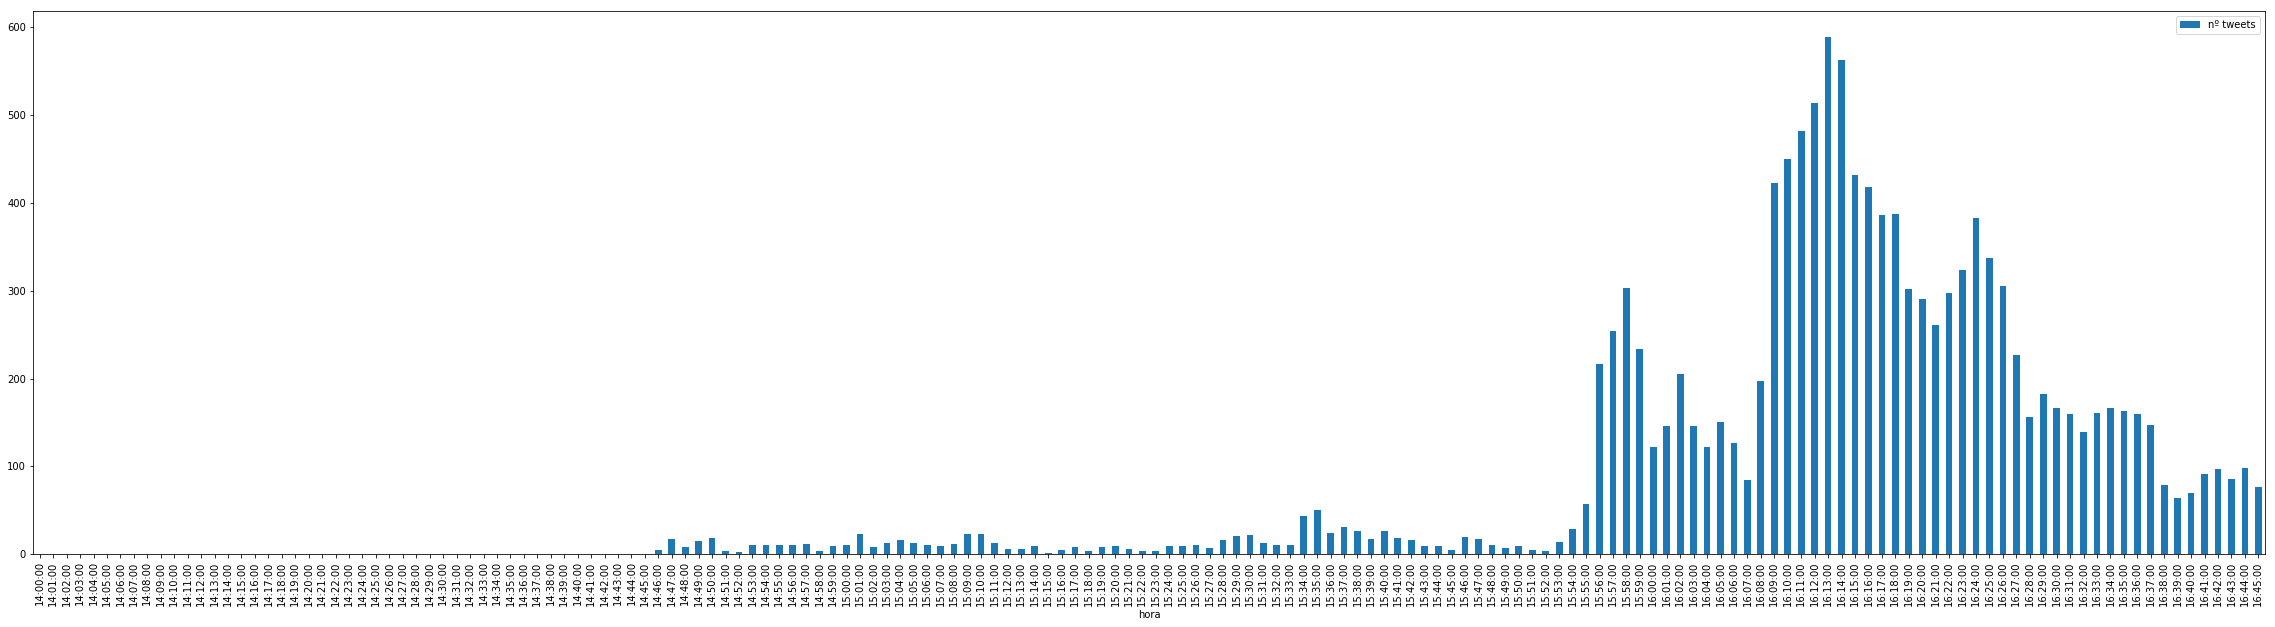

In [50]:
#Gragico de los goles por minuto 
import matplotlib.pyplot as plt
%matplotlib inline

ByMinutes.plot(kind='bar',figsize=(40,10), fontsize=10, x='hora')
plt.show()

In [53]:
#busca agrega un indice para identidicar  el numero de tweew cada 10 minuto..
resCada10Minutos = es.search(index="champion", body={"query": {"term":{"text":"goal"}},"aggs" : { "tweets_over_time" : \
                                                            { "date_histogram" : { "field" : \
                                                                                  "timestamp", "interval" : "10m" \
                                                                                 }}}})

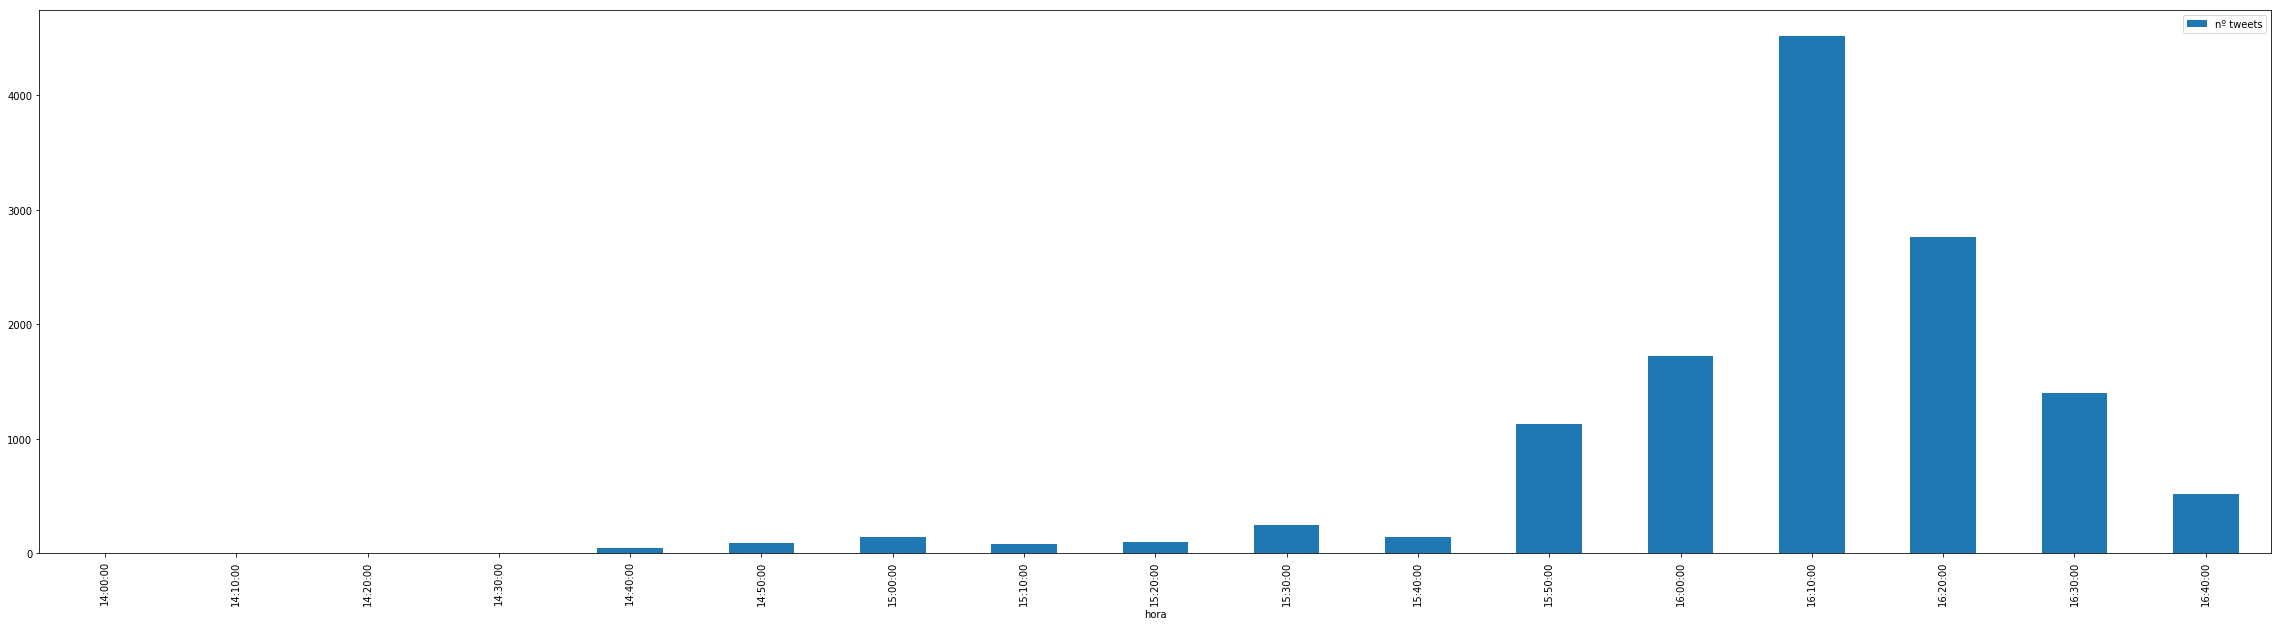

In [54]:
#Creamos un DataFrame de Panda con los datos obtenidos en la consulta Elastic
import pandas as pd
import datetime
By10Minutes = pd.DataFrame(resCada10Minutos['aggregations']['tweets_over_time']['buckets'])
By10Minutes = By10Minutes.rename(columns={'key': 'hora', 'doc_count': 'nº tweets'})

#cortar el daframe con los post minutos mas cercanos del partido
By10Minutes = By10Minutes.drop(By10Minutes[By10Minutes.hora < 1527357600000 ].index)

#tranformamos el dormato de fecha y hora
def timestamp2date(x):
    y = datetime.datetime.fromtimestamp(x/1000).strftime('%H:%M:%S')
    return y

By10Minutes['hora']=By10Minutes['hora'].apply(timestamp2date)
#Gragico de los goles cada 10 minuto 
import matplotlib.pyplot as plt
%matplotlib inline

By10Minutes.plot(kind='bar',figsize=(40,10), fontsize=10, x='hora')
plt.show()


2)En un histograma o en un line plot, visualizar dos series de datos: 
el número de tweets que hablan de ‘liverpool’ por cada minuto,
el número de tweets que hablan de ‘madrid’ por cada minuto.


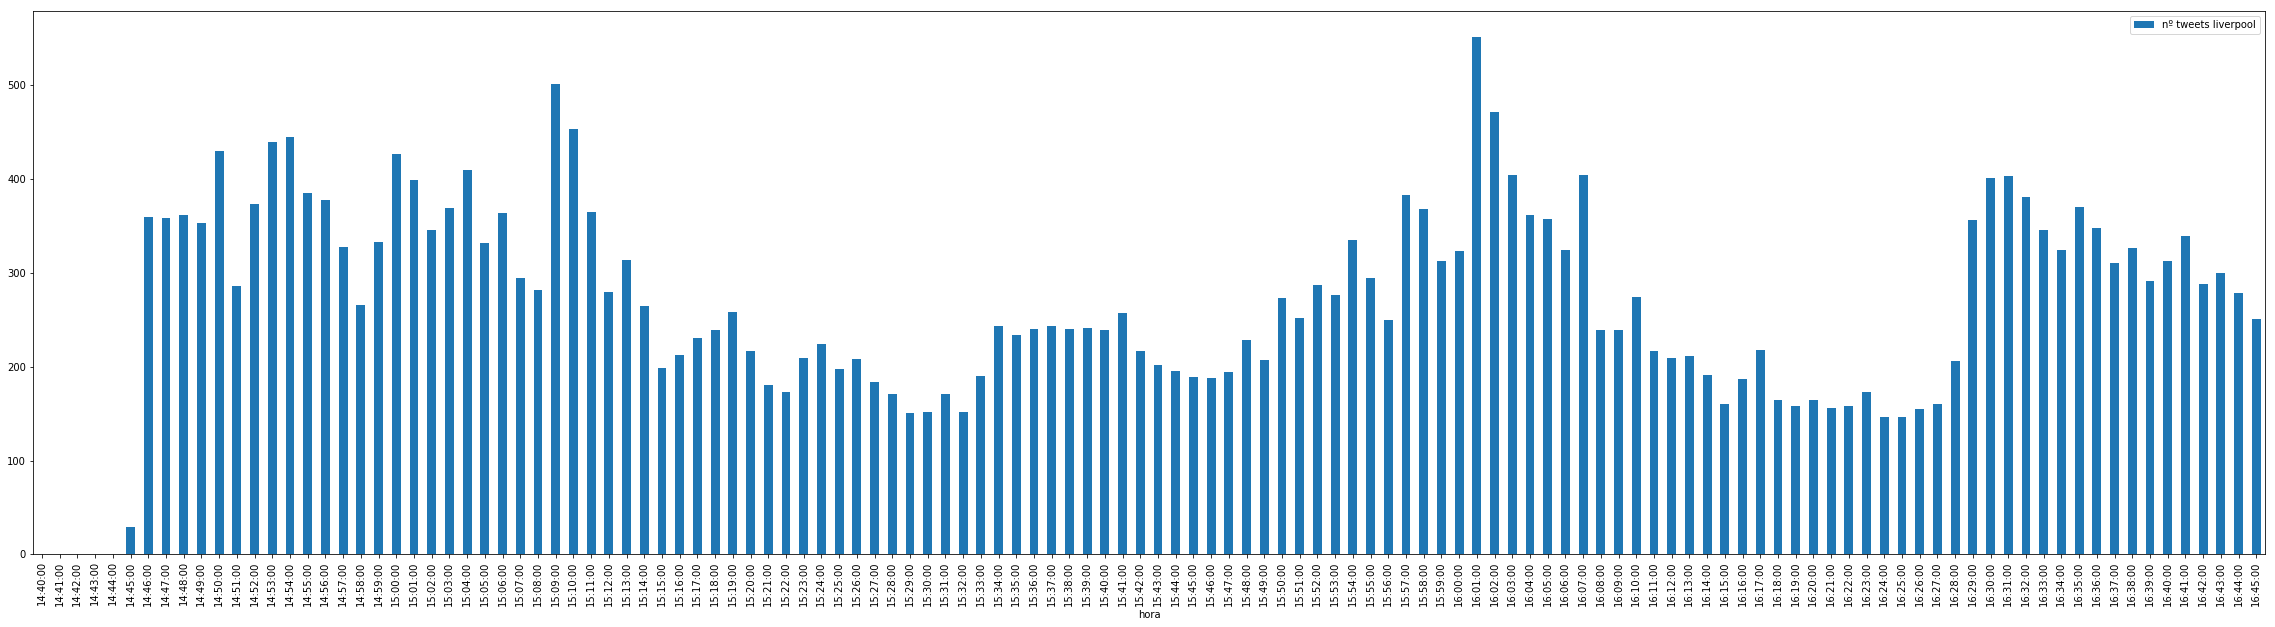

In [119]:
#busca agrega un indice para identidicar  el numero de tweew cada 1 minuto..
liverpool = es.search(index="champion", body={"query": {"term":{"text":"liverpool"}},"aggs" : { "tweets_over_time" : \
                                                            { "date_histogram" : { "field" : \
                                                                                  "timestamp", "interval" : "1m" \
                                                                                 }}}})
#Creamos un DataFrame de Panda con los datos obtenidos en la consulta Elastic
import pandas as pd
import datetime
liverpoolDF = pd.DataFrame(liverpool['aggregations']['tweets_over_time']['buckets'])
liverpoolDF = liverpoolDF.rename(columns={'key': 'hora', 'doc_count': 'nº tweets liverpool'})

#cortar el daframe con los post minutos mas cercanos del partido
liverpoolDF = liverpoolDF.drop(liverpoolDF[liverpoolDF.hora < 1527360000000 ].index)

#tranformamos el dormato de fecha y hora
def timestamp2date(x):
    y = datetime.datetime.fromtimestamp(x/1000).strftime('%H:%M:%S')
    return y

liverpoolDF['hora']=liverpoolDF['hora'].apply(timestamp2date)
#Gragico de los goles cada 1 minuto 
import matplotlib.pyplot as plt
%matplotlib inline

liverpoolDF.plot(kind='bar',figsize=(40,10), fontsize=10, x='hora')
plt.show()



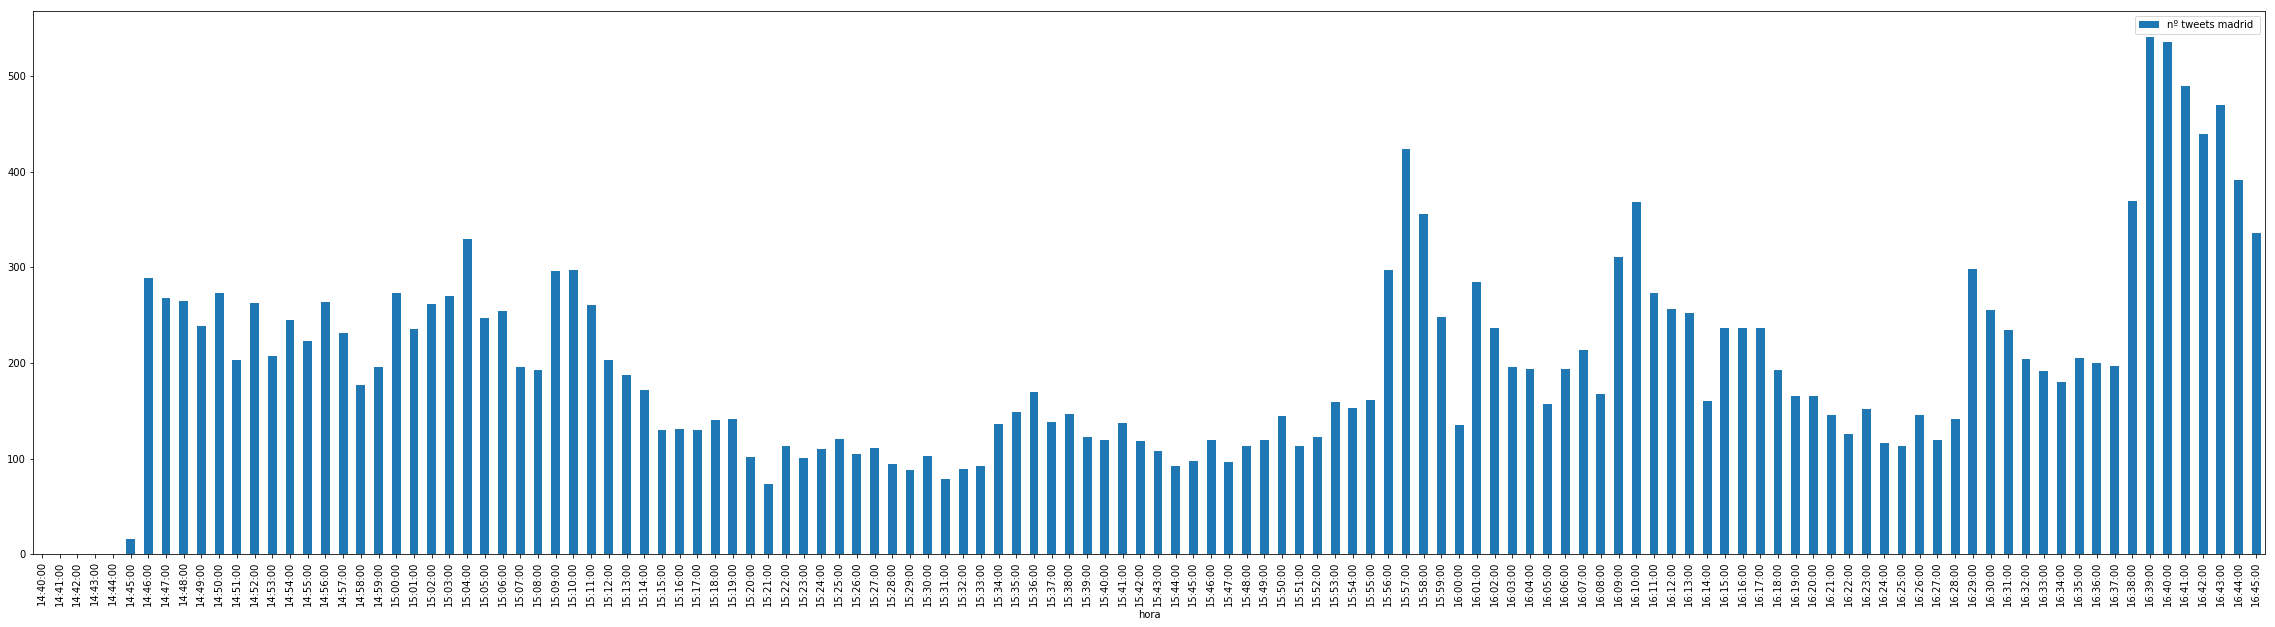

In [120]:
#busca agrega un indice para identidicar  el numero de tweew cada minuto..
madrid = es.search(index="champion", body={"query": {"term":{"text":"madrid"}},"aggs" : { "tweets_over_time" : \
                                                            { "date_histogram" : { "field" : \
                                                                                  "timestamp", "interval" : "1m" \
                                                                                 }}}})
#Creamos un DataFrame de Panda con los datos obtenidos en la consulta Elastic
import pandas as pd
import datetime
madridDF = pd.DataFrame(madrid['aggregations']['tweets_over_time']['buckets'])
madridDF = madridDF.rename(columns={'key': 'hora', 'doc_count': 'nº tweets madrid '})

#cortar el daframe con los post minutos mas cercanos del partido
madridDF = madridDF.drop(madridDF[madridDF.hora < 1527360000000 ].index)

#tranformamos el dormato de fecha y hora
def timestamp2date(x):
    y = datetime.datetime.fromtimestamp(x/1000).strftime('%H:%M:%S')
    return y

madridDF['hora']=madridDF['hora'].apply(timestamp2date)
#Gragico de los goles cada 1 minuto 
import matplotlib.pyplot as plt
%matplotlib inline

madridDF.plot(kind='bar',figsize=(40,10), fontsize=10, x='hora')
plt.show()

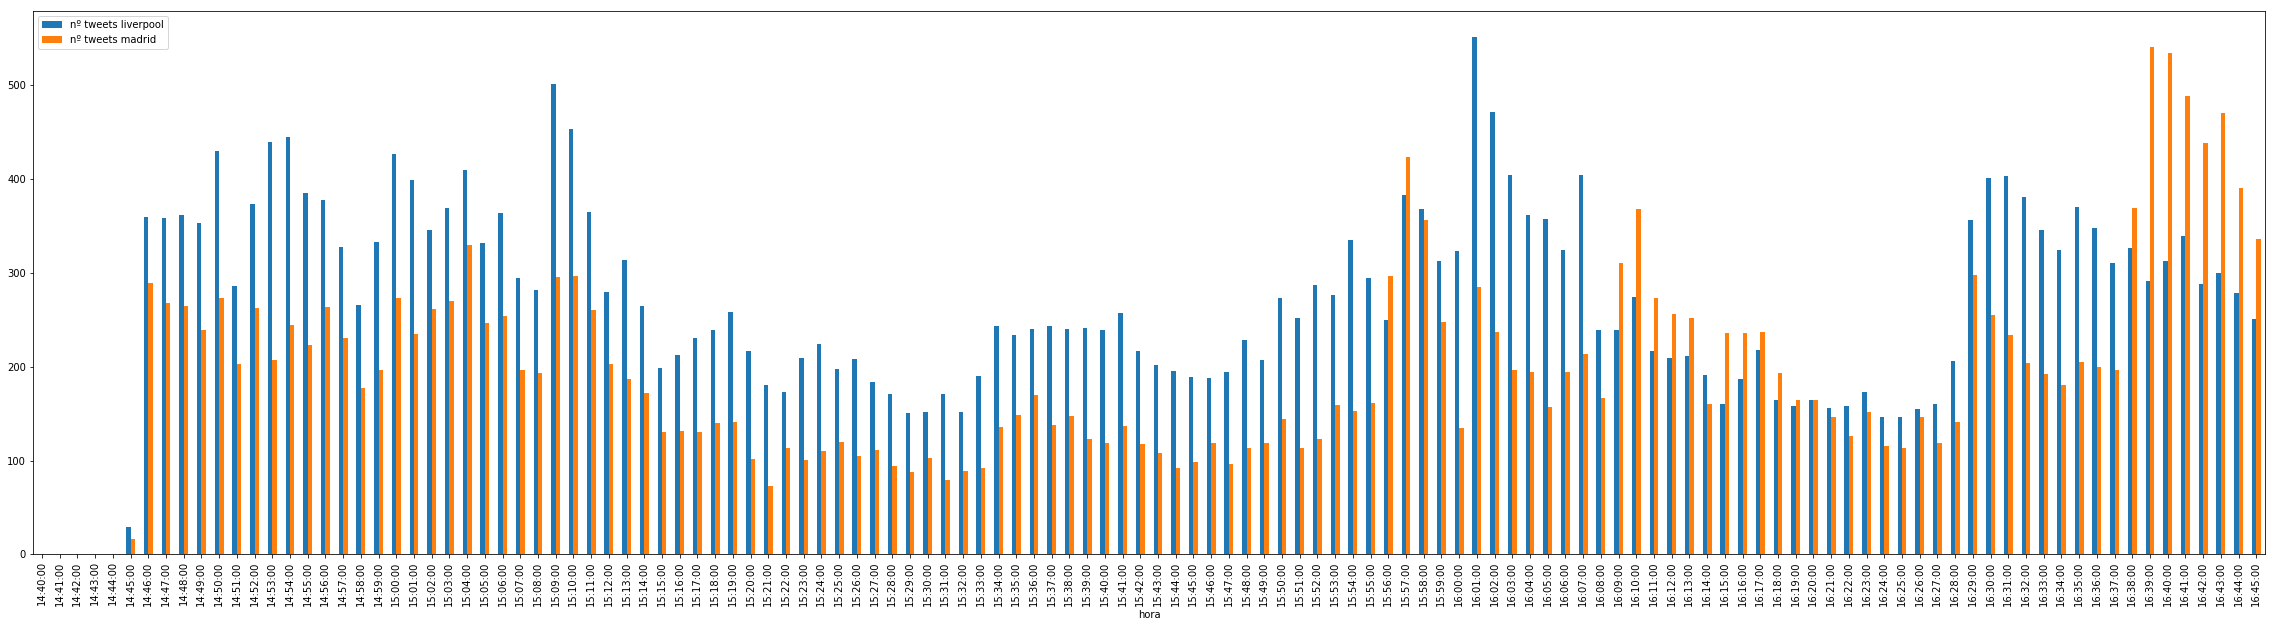

In [122]:
DF = liverpoolDF.join(madridDF.set_index('hora'), on='hora')
DF.set_index("hora")
DF.plot(kind='bar',figsize=(40,10), fontsize=10, x='hora')
plt.show()


In [123]:
# ¿A qué minuto se habla más de Madrid?

# al minuto correpondite a las 16:39

3)En un dataframe, mostrar el número de tweets según el país indicado en el campo ‘location’. ¿Desde cuáles países se enviaron los tweets? (BONUS: mostrar los resultados en una mapa).

In [136]:
Todos = es.search(index="champion", body={"query": {"match_all": {}}})


In [153]:
DF = pd.DataFrame(Todos['hits']['hits'])
DF2 =pd.DataFrame(DF._source)
DF2

,_source
0,"{'timestamp': 1527364006696, 'date': 'Sat May ..."
1,"{'timestamp': 1527361619532, 'date': 'Sat May ..."
2,"{'timestamp': 1527362154954, 'date': 'Sat May ..."
3,"{'timestamp': 1527361615586, 'date': 'Sat May ..."
4,"{'timestamp': 1527364629850, 'date': 'Sat May ..."
5,"{'timestamp': 1527366384639, 'date': 'Sat May ..."
6,"{'timestamp': 1527361689228, 'date': 'Sat May ..."
7,"{'timestamp': 1527366711846, 'date': 'Sat May ..."
8,"{'timestamp': 1527366074900, 'date': 'Sat May ..."
9,"{'timestamp': 1527360411345, 'date': 'Sat May ..."


In [124]:
#Creamos un DataFrame de Panda con los datos obtenidos en la consulta Elastic
DF = pd.DataFrame(Todos['aggregations']['tweets_over_time']['buckets'])
liverpoolDF = liverpoolDF.rename(columns={'key': 'hora', 'doc_count': 'nº tweets'})

#cortar el daframe con los post minutos mas cercanos del partido
liverpoolDF = liverpoolDF.drop(liverpoolDF[liverpoolDF.hora < 1527360000000 ].index)

#tranformamos el dormato de fecha y hora
def timestamp2date(x):
    y = datetime.datetime.fromtimestamp(x/1000).strftime('%H:%M:%S')
    return y

liverpoolDF['hora']=liverpoolDF['hora'].apply(timestamp2date)
#Gragico de los goles cada 10 minuto 
import matplotlib.pyplot as plt
%matplotlib inline

liverpoolDF.plot(kind='bar',figsize=(40,10), fontsize=10, x='hora')
plt.show()

KeyError: 'aggregations'

4)  En un histograma o en un line plot, visualizar dos series de datos:
el número de tweets enviado desde Inglaterra, por cada minuto.
el número de tweets enviado desde España, por cada minuto.


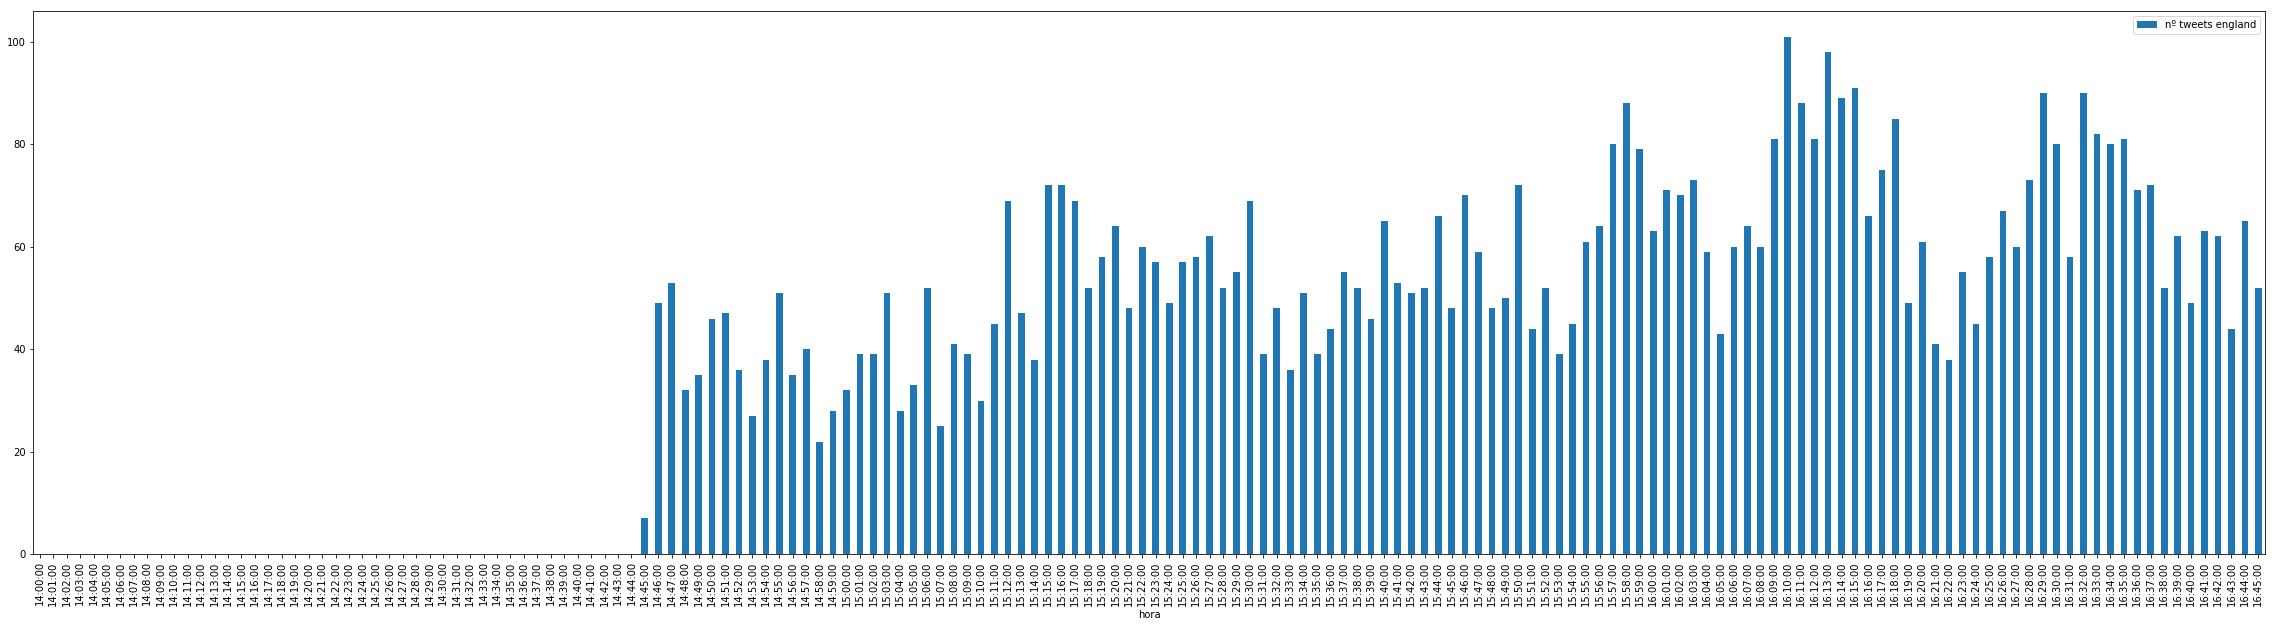

In [84]:
#el número de tweets enviado desde Inglaterra
#busca agrega un indice para identidicar  el numero de tweew cada 1 minuto..
res = es.search(index="champion", body={"query": {"term":{"location":"england"}},"aggs" : { "tweets_over_time" : \
                                                            { "date_histogram" : { "field" : \
                                                                                  "timestamp", "interval" : "1m" \
                                                                                 }}}})
#Creamos un DataFrame de Panda con los datos obtenidos en la consulta Elastic
DF1 = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
DF1 = DF1.rename(columns={'key': 'hora', 'doc_count': 'nº tweets england'})

#cortar el daframe con los post minutos mas cercanos del partido
DF1 = DF1.drop(DF1[DF1.hora < 1527360000000 ].index)

#tranformamos el dormato de fecha y hora
def timestamp2date(x):
    y = datetime.datetime.fromtimestamp(x/1000).strftime('%H:%M:%S')
    return y

DF1['hora']=DF1['hora'].apply(timestamp2date)
#Grágico de los goles cada 10 minuto 
import matplotlib.pyplot as plt
%matplotlib inline

DF1.plot(kind='bar',figsize=(40,10), fontsize=10, x='hora')
plt.show()


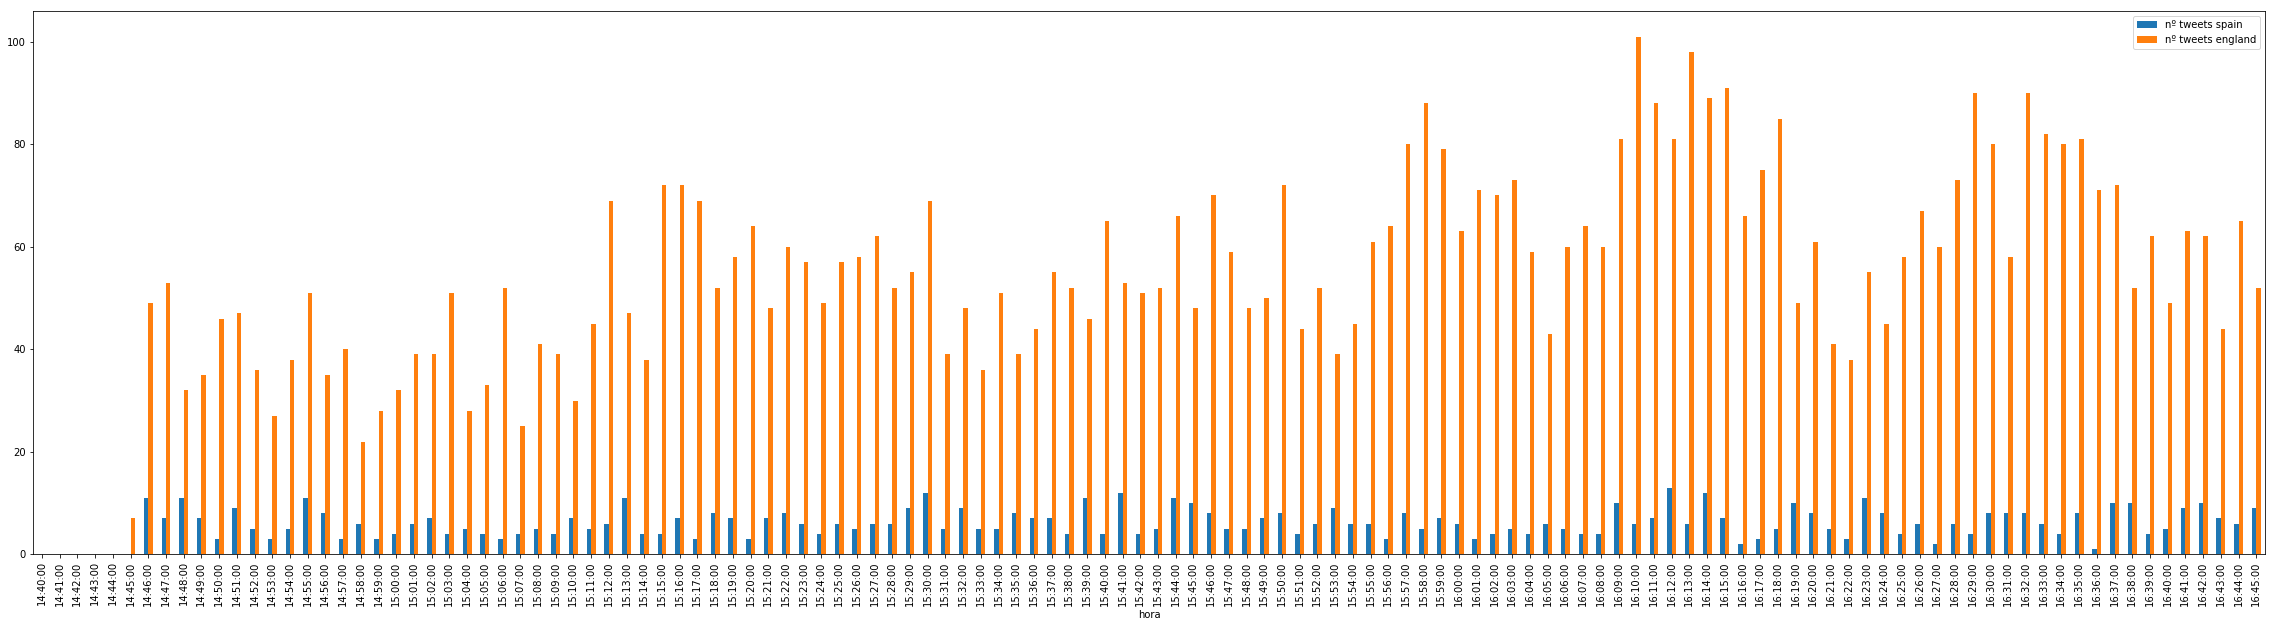

In [125]:
#el número de tweets enviado desde Inglaterra
#busca agrega un indice para identidicar  el numero de tweew cada 1 minuto..
res = es.search(index="champion", body={"query": {"term":{"location":"spain"}},"aggs" : { "tweets_over_time" : \
                                                            { "date_histogram" : { "field" : \
                                                                                  "timestamp", "interval" : "1m" \
                                                                                 }}}})
#Creamos un DataFrame de Panda con los datos obtenidos en la consulta Elastic
DF2 = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
DF2 = DF2.rename(columns={'key': 'hora', 'doc_count': 'nº tweets spain'})

#cortar el daframe con los post minutos mas cercanos del partido
DF2 = DF2.drop(DF2[DF2.hora < 1527360000000 ].index)

#tranformamos el dormato de fecha y hora
def timestamp2date(x):
    y = datetime.datetime.fromtimestamp(x/1000).strftime('%H:%M:%S')
    return y

DF2['hora']=DF2['hora'].apply(timestamp2date)
#Grágico de los los tweet de Inglaterra por minuto

DF = DF2.join(DF1.set_index('hora'), on='hora')
DF.set_index("hora")

import matplotlib.pyplot as plt
%matplotlib inline

DF.plot(kind='bar',figsize=(40,10), fontsize=10, x='hora')
plt.show()


 ¿Cómo podríamos analizar las emociones expresadas durante el partido? Proponer una metodología para responder a esta pregunta. (No es obligatorio implementar su metodología pero debe ser factible con las tecnologías que conocen). 


Cargado los datos de los tweet en elastic Search, podriamos clasificar distintas emociones apartir de los emogis que se escrien en los tweets
por ejemplo las emociones mas comunes son 
-⚽ si se usa mucho es como identificar la palabra gol en tweet el cuel empresa alegria de un equipo
-😂 expresa burlas,de una situacion que haya ocurrido en el partido.
-😡 expresa el enojo o la indignacion de alguien
-👊 estos puños se encuentran en varios tweet que intentan tramitir confianza.

la idea seria contar el uso de cada emoji durante el partido y predicir alguna situacion que haya desatado el uso de emojis 